In [1]:
from deta import Deta
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt

In [2]:
DETAKEY = "b0nuscm7yka_CWJRCsPHdCAkTspwGnHoM7jcg2HPu3Zs"
deta = Deta(DETAKEY)

db = deta.Base("grupo1_alumnos")
db2 = deta.Base("grupo1_asistencia")
db3 = deta.Base("grupo1_participacion")

In [3]:
def nuevo_alumno(key: str, nombre: str, apellido: str, edad: int, asistencias: int, participaciones : int):
    return db.put({"key" : key, "nombre" : nombre, "apellido": apellido, "edad": edad, "asistencias": asistencias, "participaciones": participaciones})

def fetch_alumnos():
    res = db.fetch()
    return res.items

def get_alumno(key):
    return db.get(key)

def update_alumno(key, updates):
    return db.update(key, updates)

def delete_alumno(key):
    return db.delete(key)

In [4]:
data2 = list(db2.fetch({}).items)

In [11]:
datetime.now().date()

datetime.date(2023, 11, 26)

In [18]:
df_asistencias = pd.DataFrame(data)
df_asistencias["fecha"] = df_asistencias["fecha"].apply(lambda x: pd.to_datetime(x).date())
df_asistencias[df_asistencias["fecha"] == datetime.now().date()]["alumno"].unique()

array(['Diego', 'Elias', 'Ana', 'Jose', 'Emi'], dtype=object)

In [8]:
data_participaciones = list(db3.fetch({}).items)

data_participaciones = [{**entry, 'day_of_week': calendar.day_name[datetime.strptime(entry['fecha'], "%Y-%m-%d %H:%M:%S").weekday()]} for entry in data_participaciones]


In [9]:
data_participaciones

[{'alumno': 'Elias',
  'fecha': '2023-11-26 17:05:03',
  'key': '0kvztifsz5nv',
  'participaciones': 1,
  'day_of_week': 'Sunday'},
 {'alumno': 'Ana',
  'fecha': '2023-11-26 16:56:45',
  'key': '3s6uhl3gg3aq',
  'participaciones': 2,
  'day_of_week': 'Sunday'},
 {'alumno': 'Diego',
  'fecha': '2023-11-26 17:23:22',
  'key': '6gme55dsq8z0',
  'participaciones': 1,
  'day_of_week': 'Sunday'},
 {'alumno': 'Diego',
  'fecha': '2023-11-26 16:46:07',
  'key': '6plu1am7kvzq',
  'participaciones': 3,
  'day_of_week': 'Sunday'},
 {'alumno': 'Diego',
  'fecha': '2023-11-26 17:11:35',
  'key': '7l50nw0vsmsk',
  'participaciones': 2,
  'day_of_week': 'Sunday'},
 {'alumno': 'Ana',
  'fecha': '2023-11-26 16:39:38',
  'key': '89drjsf0mtkj',
  'participaciones': 2,
  'day_of_week': 'Sunday'},
 {'alumno': 'Diego',
  'fecha': '2023-11-26 15:10:33',
  'key': 'b7iujmykxmj0',
  'participaciones': 2,
  'day_of_week': 'Sunday'},
 {'alumno': 'Elias',
  'fecha': '2023-11-26 16:13:31',
  'key': 'des78qwj45yz',


In [13]:
alumnos

['Elias', 'Ana', 'Diego']

In [14]:
participaciones

[12, 4, 17]

Text(0.5, 1.0, 'Participación por alumno')

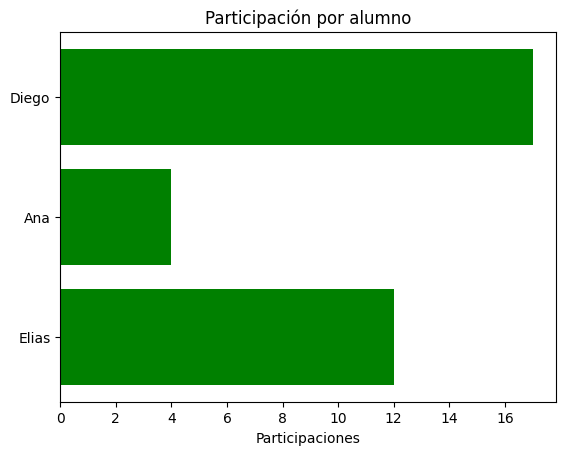

In [12]:
alumnos = list(set([item['alumno'] for item in data_participaciones]))
participaciones = []
for alumno in alumnos:
    participaciones.append(sum([item['participaciones'] for item in data_participaciones if item['alumno'] == alumno]))

fig, ax = plt.subplots()
ax.barh(alumnos, participaciones, color='green')
ax.set_xlabel('Participaciones')
ax.set_title('Participación por alumno')

In [4]:
import streamlit as st
import numpy as np
import pandas as pd
import face_recognition
import pickle
from pathlib import Path
import streamlit_authenticator as stauth
import matplotlib.pyplot as plt
import cv2
from st_pages import Page, Section, add_page_title, show_pages
from deta import Deta
from datetime import datetime
import calendar
# st.set_page_config(layout="wide")
# Datos ficticios


DETAKEY = "b0nuscm7yka_pJWqFJMpuzDYxCpuD83GFPQe98mdJjXj"
deta = Deta(DETAKEY)
db = deta.Base("grupo1_alumnos")
db2 = deta.Base("grupo1_asistencia")

def fetch_base():
    res = db.fetch()
    return res.items

def get_alumno(key):
    return db.get(key)

def update_alumno(key, updates):
    return db.update(key, updates)

def delete_alumno(key):
    return db.delete(key)

data = list(db2.fetch({}).items)


In [5]:
data = [{**entry, 'day_of_week': calendar.day_name[datetime.strptime(entry['fecha'], "%Y-%m-%d %H:%M:%S").weekday()]} for entry in data]


In [27]:

# Crear listas de alumnos, asistencias, participaciones y días
alumnos = list(set([item['alumno'] for item in data]))

asistencias = []
for alumno in alumnos:
    asistencias.append(sum([1 for item in data if item['alumno'] == alumno and item['asistio']]))

participaciones = []
for alumno in alumnos:
    participaciones.append(sum([item['participaciones'] for item in data if item['alumno'] == alumno]))

dias = ['monday', 'tuesday', 'wednesday', 'thrusday', 'friday']
asistencia_por_dia = []
for dia in dias:
    asistencia_por_dia.append(sum([1 for item in data if item['day_of_week'].lower() == dia]))


In [28]:
asistencia_por_dia

[3, 0, 0, 0, 0]

In [23]:
str(data[2]["day_of_week"])

'Sunday'